In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
df=pd.read_csv("train.csv")

In [3]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,19:50,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30,8:45,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,5/4/2022,18:00,18:10,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30,13:45,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30


In [4]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          43739 non-null  float64
 3   Delivery_person_Ratings      43685 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weather                      44977 non-null  object 
 12  Road_traffic_density         44992 non-null  object 
 13  Vehicle_conditio

In [5]:
# Check the null values
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather                         616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken                        0
dtype: int64

In [6]:
pip install h3

Note: you may need to restart the kernel to use updated packages.


In [7]:
from h3 import h3

In [8]:
# Calculate distance using latitude and longitude
df['distance']=df.apply(lambda row:h3.point_dist((row['Restaurant_latitude'],row['Restaurant_longitude']),(row['Delivery_location_latitude'],row['Delivery_location_longitude'])),axis=1)

In [9]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,distance
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,...,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,3.025153
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,...,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,20.183552
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30,...,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,1.552760
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,5/4/2022,18:00,...,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,7.790410
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30,...,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,6.210145


In [10]:
# Check for outliers
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken,distance
count,43739.000000,43685.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,44600.000000,45593.000000,45593.000000
mean,29.567137,4.633780,17.017729,70.231332,17.465186,70.845702,1.023359,0.744664,26.294607,99.304023
std,5.815155,0.334716,8.185109,22.883647,7.335122,21.118812,0.839065,0.572473,9.383806,1099.732520
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000,1.465069
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000,4.663498
50%,30.000000,4.700000,18.546947,75.898497,18.633934,76.002574,1.000000,1.000000,26.000000,9.264291
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000,13.763993
90%,38.000000,4.900000,26.888420,80.275235,26.922313,80.366442,2.000000,1.000000,40.000000,19.395829
95%,39.000000,5.000000,26.913987,85.325347,27.023726,85.375486,2.000000,2.000000,44.000000,20.179211
99%,39.000000,5.000000,30.892978,88.354797,30.939617,88.412885,3.000000,2.000000,49.000000,20.968913


In [11]:
df[df['distance']>21].shape

(431, 21)

In [12]:
# Outlier Capping
df['distance']=np.where(df['distance']>21,21,df['distance'])

In [13]:
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken,distance
count,43739.000000,43685.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,44600.000000,45593.000000,45593.000000
mean,29.567137,4.633780,17.017729,70.231332,17.465186,70.845702,1.023359,0.744664,26.294607,9.841894
std,5.815155,0.334716,8.185109,22.883647,7.335122,21.118812,0.839065,0.572473,9.383806,5.687379
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000,1.465069
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000,4.663498
50%,30.000000,4.700000,18.546947,75.898497,18.633934,76.002574,1.000000,1.000000,26.000000,9.264291
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000,13.763993
90%,38.000000,4.900000,26.888420,80.275235,26.922313,80.366442,2.000000,1.000000,40.000000,19.395829
95%,39.000000,5.000000,26.913987,85.325347,27.023726,85.375486,2.000000,2.000000,44.000000,20.179211
99%,39.000000,5.000000,30.892978,88.354797,30.939617,88.412885,3.000000,2.000000,49.000000,20.968913


<AxesSubplot:xlabel='distance'>

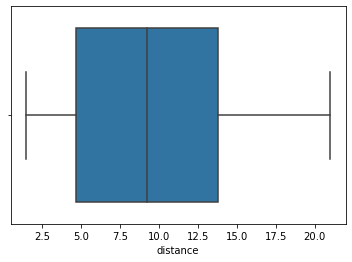

In [14]:
sns.boxplot(df['distance'])

In [15]:
# Convert Order_Date column to datetime format
def autoconvert_datetime(value):
    formats = ['%m/%d/%Y', '%d-%m-%Y']  
    result_format = '%d-%m-%Y' 
    for dt_format in formats:
        try:
            dt_obj = datetime.strptime(value, dt_format)
            return dt_obj.strftime(result_format)
        except Exception as e:  
            pass
    return value  

df['Order_Date'] = df['Order_Date'].apply(autoconvert_datetime)
df['Date'] = pd.to_datetime(df['Order_Date'])
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,distance,Date
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,...,High,2,Snack,motorcycle,0.0,No,Urban,24,3.025153,2022-03-19
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,...,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,20.183552,2022-03-25
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30,...,Low,0,Drinks,motorcycle,1.0,No,Urban,26,1.552760,2022-03-19
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,5/4/2022,18:00,...,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,7.790410,2022-05-04
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30,...,High,1,Snack,scooter,1.0,No,Metropolitian,30,6.210145,2022-03-26


In [16]:
# Extract month from the Order_Date column
df['month']=pd.DatetimeIndex(df['Date']).month
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,distance,Date,month
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,...,2,Snack,motorcycle,0.0,No,Urban,24,3.025153,2022-03-19,3
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,...,2,Snack,scooter,1.0,No,Metropolitian,33,20.183552,2022-03-25,3
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30,...,0,Drinks,motorcycle,1.0,No,Urban,26,1.552760,2022-03-19,3
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,5/4/2022,18:00,...,0,Buffet,motorcycle,1.0,No,Metropolitian,21,7.790410,2022-05-04,5
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30,...,1,Snack,scooter,1.0,No,Metropolitian,30,6.210145,2022-03-26,3


In [17]:
# Create list of continuous, categorical and target columns
cont_col=['Delivery_person_Age','Time_taken','distance']
cat_col=['Weather','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City','month']
taget_col=['Delivery_person_Ratings']

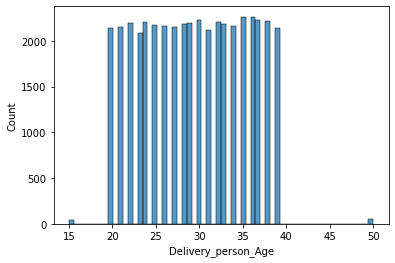

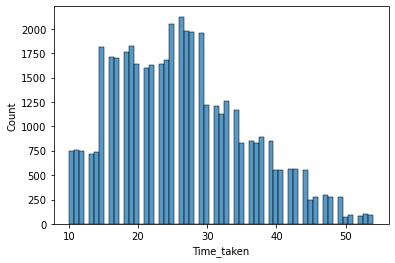

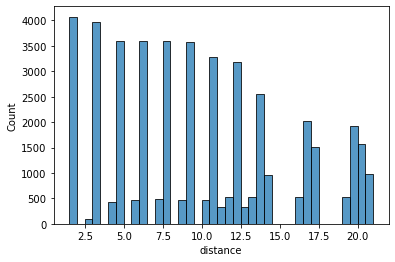

In [18]:
# Plot histogram for continuous variables
for i in cont_col:
    sns.histplot(df[i])
    plt.show()

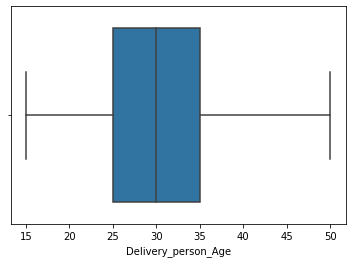

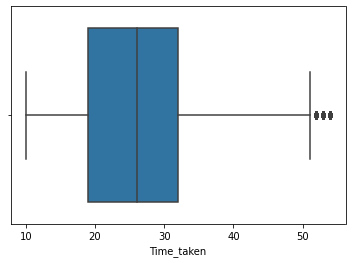

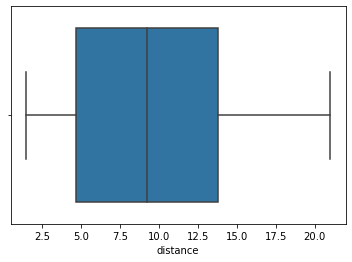

In [19]:
# Boxplot for continuous variables
for i in cont_col:
    sns.boxplot(df[i])
    plt.show()

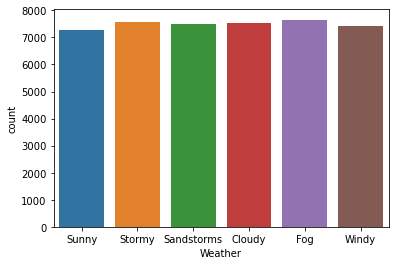

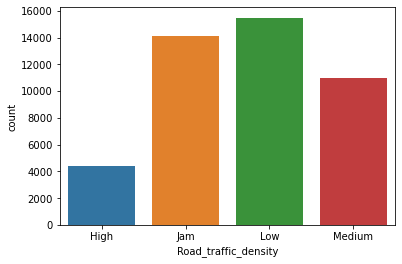

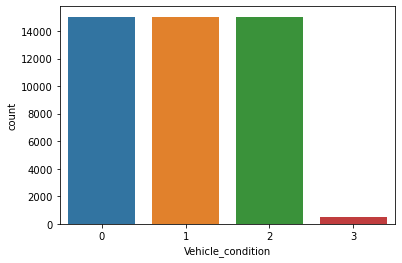

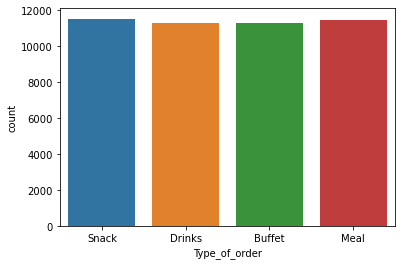

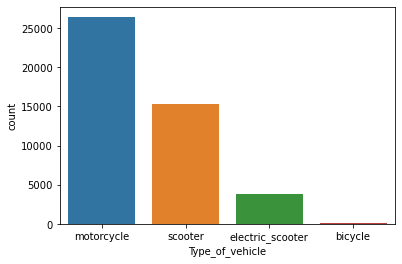

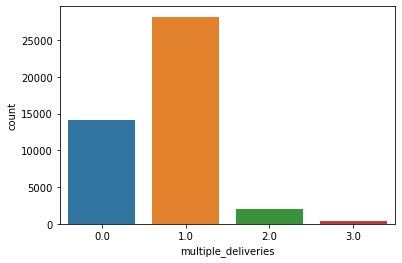

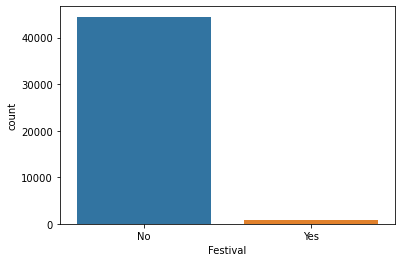

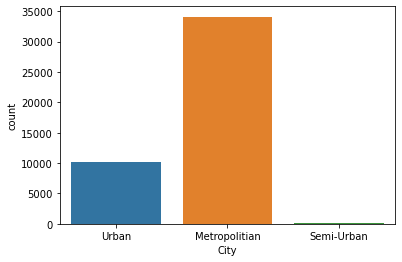

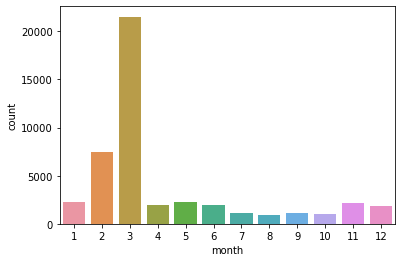

In [20]:
# Countplot for categorical variables
for i in cat_col:
    sns.countplot(df[i])
    plt.show()

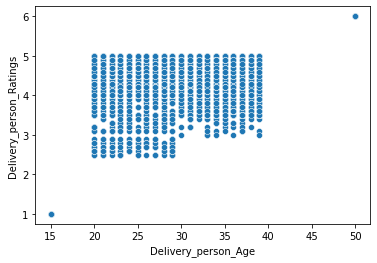

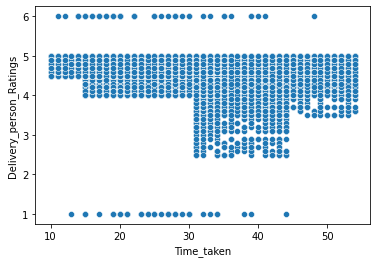

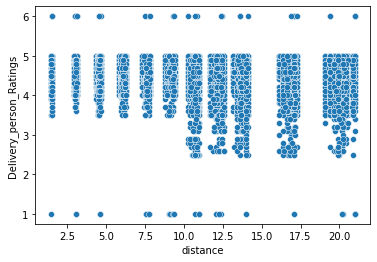

In [21]:
# Scatter plot for continuous variables
for i in cont_col:
    sns.scatterplot(df[i],df["Delivery_person_Ratings"])
    plt.show()

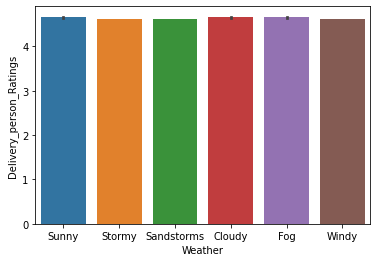

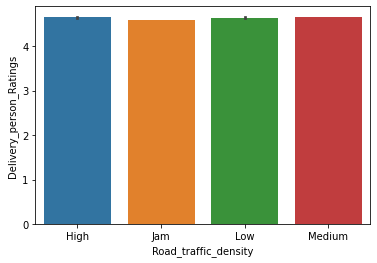

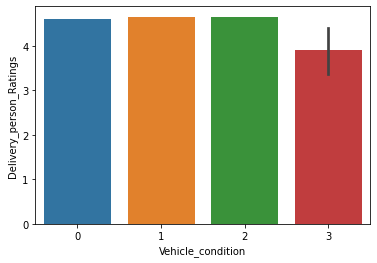

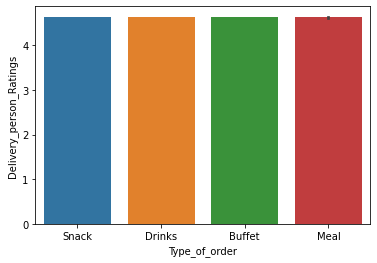

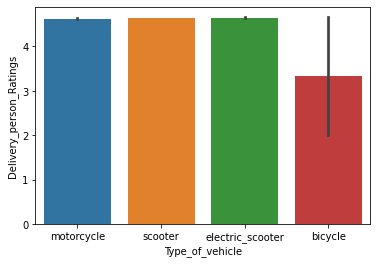

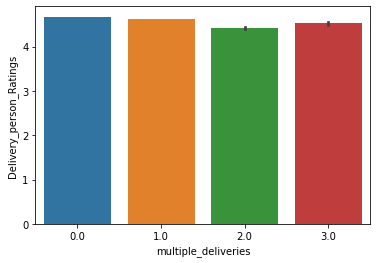

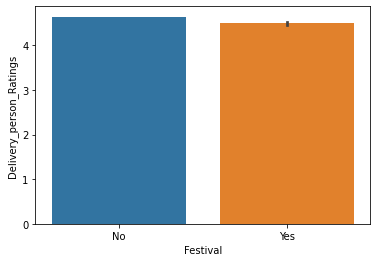

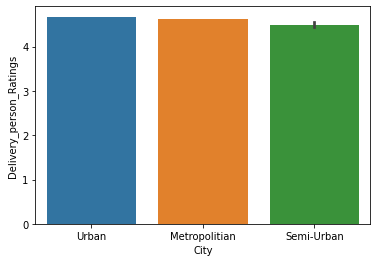

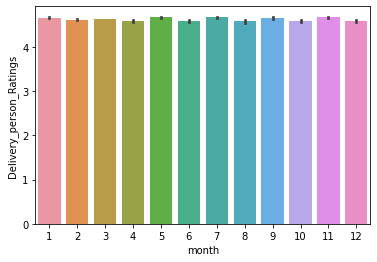

In [22]:
# Barplot for categrical variables
for i in cat_col:
    sns.barplot(df[i],df["Delivery_person_Ratings"])
    plt.show()

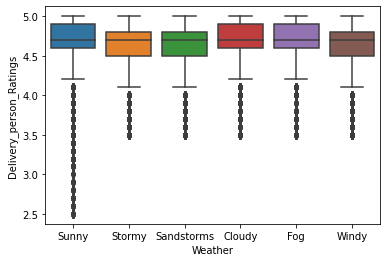

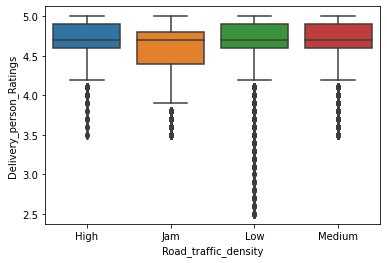

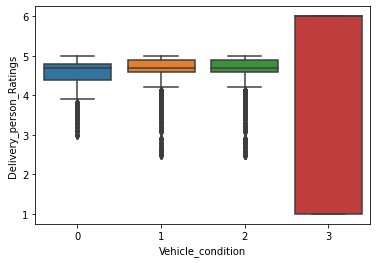

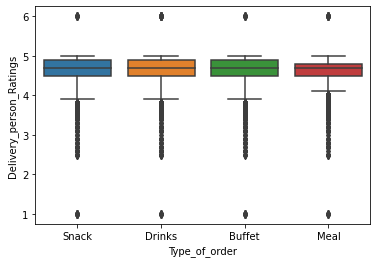

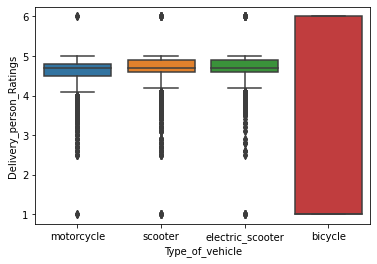

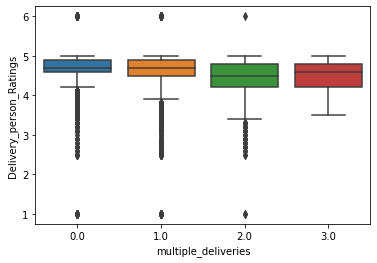

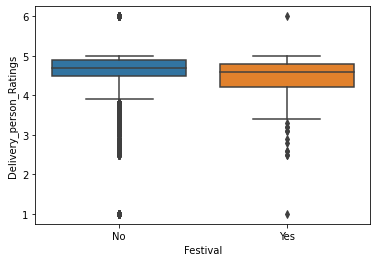

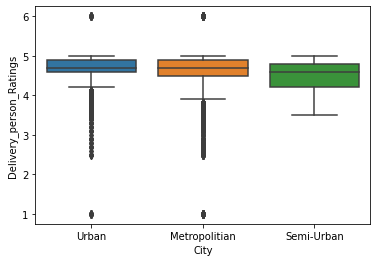

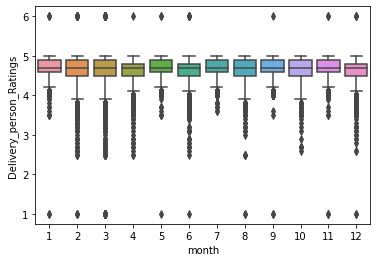

In [23]:
# Boxplot for categorical variables
for i in cat_col:
    sns.boxplot(df[i],df["Delivery_person_Ratings"])
    plt.show()

<AxesSubplot:>

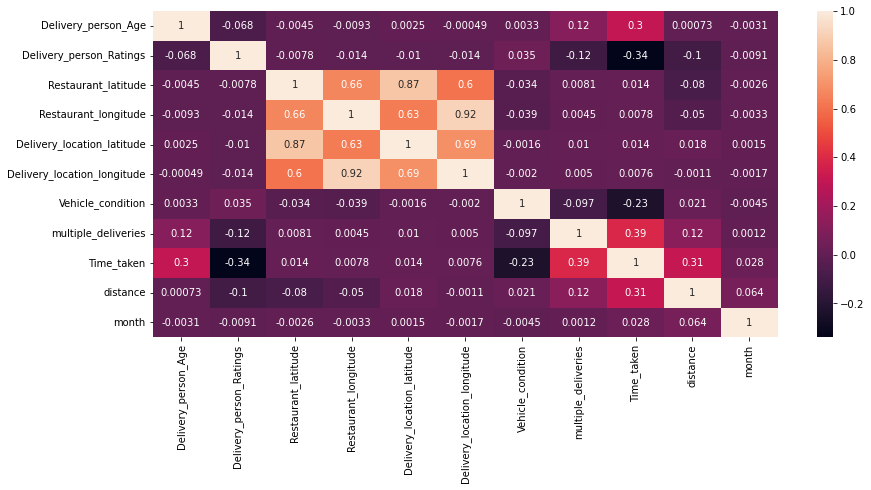

In [24]:
# Correlation between variables
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),annot=True)